In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.utils import load_cifar10_data, create_cnn_model, generate_pseudo_labels

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = load_cifar10_data()

# Ensure correct data types
x_train = x_train.astype(np.float32)
y_train = np.array(y_train).astype(np.int32)
x_test = x_test.astype(np.float32)
y_test = np.array(y_test).astype(np.int32)

# Verify shapes
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3), y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000,)


In [20]:
# Define model
model = create_cnn_model()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Train model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_initial = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3060 - loss: 2.1531 - val_accuracy: 0.5564 - val_loss: 1.2349
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5763 - loss: 1.2061 - val_accuracy: 0.6659 - val_loss: 0.9372
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6613 - loss: 0.9676 - val_accuracy: 0.7303 - val_loss: 0.7705
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7054 - loss: 0.8600 - val_accuracy: 0.7348 - val_loss: 0.7811
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7388 - loss: 0.7715 - val_accuracy: 0.7712 - val_loss: 0.6646
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7613 - loss: 0.7109 - val_accuracy: 0.7629 - val_loss: 0.6917
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7733 - loss: 0.6629 - val_accuracy: 0.7902 - val_loss: 0.6215
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7906 -

In [21]:
# Generate pseudo labels
unlabeld_data = x_test[:5000]
pseudo_labels = generate_pseudo_labels(model, unlabeld_data)

# Combine labeled and pseudo labeled data
combined_x = np.concatenate((x_train, unlabeld_data))
combined_y = np.concatenate((y_train, pseudo_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━

In [23]:
# Train with combined data
model = create_cnn_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_combined = model.fit(combined_x, combined_y, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.3243 - loss: 2.0849 - val_accuracy: 0.5860 - val_loss: 1.1672
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.5905 - loss: 1.1645 - val_accuracy: 0.6963 - val_loss: 0.8598
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.6738 - loss: 0.9453 - val_accuracy: 0.7334 - val_loss: 0.7878
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.7199 - loss: 0.8289 - val_accuracy: 0.7418 - val_loss: 0.7666
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.7469 - loss: 0.7515 - val_accuracy: 0.7464 - val_loss: 0.7423
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.7703 - loss: 0.6830 - val_accuracy: 0.7826 - val_loss: 0.6526
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.7852 - loss: 0.6448 - val_accuracy: 0.8064 - val_loss: 0.5662
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.7970 -

In [24]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 2s - 7ms/step - accuracy: 0.8513 - loss: 0.5790
Test accuracy: 85.13%


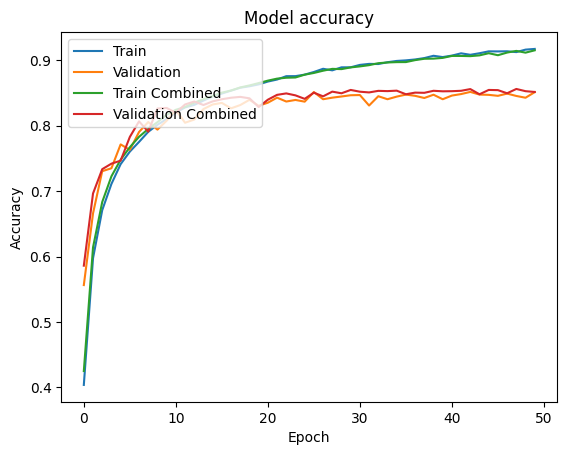

In [25]:
# Plot training and validation accuracy
plt.plot(history_initial.history['accuracy'])
plt.plot(history_initial.history['val_accuracy'])
plt.plot(history_combined.history['accuracy'])
plt.plot(history_combined.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')
plt.show()

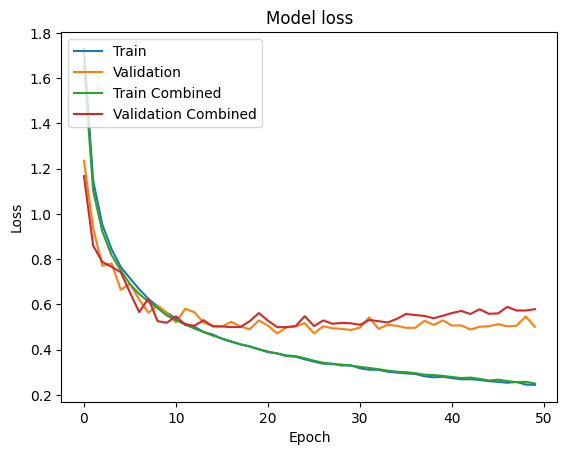

In [26]:
plt.plot(history_initial.history['loss'])
plt.plot(history_initial.history['val_loss'])
plt.plot(history_combined.history['loss'])
plt.plot(history_combined.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Combined', 'Validation Combined'], loc='upper left')
plt.show()